<a href="https://colab.research.google.com/github/NIETOCAMBRON7/Simulacion-2/blob/main/Exmen/Ejercicio3_Ex%C3%A1men.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno: Nieto Cambrón Daniel Alejandro
## Boleta: 2015030917
## Fecha: 07 de mayo de 2023
### Primer Examen parcial: Simulación 1

# <font color='blue'>Ejercicio 3</font>

Una empresa dispone de varias máquinas herramienta cuyas herramientas de corte
se desgastan constantemente. Cuando esto ocurre, la máquina es inservible. En la
actualidad el mantenimiento es correctivo reemplazándose una herramienta cuando falla. Dado que cada máquina dispone de una torre con cinco herramientas, se propone reemplazar toda la torre de herramientas (las cinco herramientas de golpe) cada vez que falle una, lo que debería reducir la frecuencia de desgaste de las herramientas. El tiempo necesario para el reemplazo de una herramienta es de una hora. Las cinco pueden reemplazarse en dos horas. El coste de una hora de máquina parada es de cien euros. Cada herramienta cuesta diez euros. 

La tabla siguiente recoge los datos de averías en el caso de sustituir una sola herramienta cada vez.

| Horas entre averías | Probabilidad |
|---------------------|--------------|
| 20                  | 0.05         |
| 30                  | 0.15         |
| 40                  | 0.15         |
| 50                  | 0.20         |
| 60                  | 0.20         |
| 70                  | 0.15         |
| 80                  | 0.10         |

Si las cinco herramientas se cambian cada vez que una falla, la distribución de probabilidad entre fallos es la siguiente:

| Horas entre averías | Probabilidad |
|---------------------|--------------|
| 30                  | 0.05         |
| 40                  | 0.15         |
| 50                  | 0.15         |
| 60                  | 0.20         |
| 70                  | 0.20         |
| 80                  | 0.15         |
| 90                  | 0.10         |


Vamos a resolver este problema, procurando seguir la metodología vista en el curso.


###(a) Determine mediante simulación la mejor política de reemplazo de las herramientas de corte.

####Paso 1. Identifique las variables 


El primer paso sera seccionar nuestros intervalos y los tomaremos como sigue:

Averías en el caso de sustituir una sola herramienta cada vez.

| Horas entre averias    |  f(x) |   F(x)  | Intervalos   |
|------------------------|-------|---------|--------------|
| 20                     | 0.05  |   0.05  |  [0.00,0.05) |
| 30                     | 0.15  |   0.20  |  [0.05,0.20) |
| 40                     | 0.15  |   0.35  |  [0.20,0.35) |
| 50                     | 0.20  |   0.55  |  [0.35,0.55) |
| 60                     | 0.20  |   0.75  |  [0.55,0.75) |
| 70                     | 0.15  |   0.90  |  [0.75,0.90) |
| 80                     | 0.10  |   1.00  |  [0.90,1.00] |

Ahora bien, para este caso particular utilizaremos la funcion añadida en Python, "random.random()" para elegir numeros aleatorios entre 0 y 1, una vez que se ha elegido el numero, nos posicionaremos en la posicion de Horas de averia que corresponda, segun el numero elegido al azar y nuestros intervalos dados, y diremos que nuestra proxima averia se dara en un Tiempo = Numero seleccionado de "Horas entre averias" correspondiente al intervalo dado.

Por lo tanto consideraremos $Tiempo: [T]$, $Tiempo2: [T_2]$

In [5]:
#La biblioteca random proporciona funciones para generar números aleatorios en
# Python. Se utiliza principalmente para aplicaciones de juegos y simulaciones

import random

#La biblioteca numpy es una biblioteca de Python utilizada para cálculos 
# numéricos en general y es especialmente útil para el procesamiento de matrices 
# y arreglos multidimensionales. 

import numpy as np

def tiempo():
    aleatorio = random.random()
    if aleatorio < 0.05:
        return 20
    elif aleatorio < 0.20:
        return 30
    elif aleatorio < 0.35:
        return 40
    elif aleatorio < 0.55:
        return 50
    elif aleatorio < 0.75:
        return 60
    elif aleatorio < 0.90:
        return 70
    else:
        return 80

Una vez que se ha definido lo anterior, se continua como sigue:

Y ahora definimos, la siguiente tabla, que hace referencia a Averías en caso de sustituir la torre de 5 herramientas.

| Horas entre averias    |  f(x) |   F(x)  | Intervalos   |
|------------------------|-------|---------|--------------|
| 30                     | 0.05  |   0.05  |  [0.00,0.05) |
| 40                     | 0.15  |   0.20  |  [0.05,0.20) |
| 50                     | 0.15  |   0.35  |  [0.20,0.35) |
| 60                     | 0.20  |   0.55  |  [0.35,0.55) |
| 70                     | 0.20  |   0.75  |  [0.55,0.75) |
| 80                     | 0.15  |   0.90  |  [0.75,0.90) |
| 90                     | 0.10  |   1.00  |  [0.90,1.00] |

y analogamente se hara una funcion en Python que nos ayude a seleccionar esto, y se muestra a continuacion:

In [6]:
def tiempo2():
    aleatorio = random.random()
    if aleatorio < 0.05:
        return 30
    elif aleatorio < 0.20:
        return 40
    elif aleatorio < 0.35:
        return 50
    elif aleatorio < 0.55:
        return 60
    elif aleatorio < 0.75:
        return 70
    elif aleatorio < 0.90:
        return 80
    else:
        return 90


#### Paso 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

Esta distribución es un ejemplo de una distribución discreta no uniforme. y Se modelan de manera en que estan definidas en 

los codigos anteriores

**def tiempo()** correspondiente a $Tiempo: [T]$

**def tiempo2()**correspondiente a  $Tiempo2: [T_2]$

De manera analitica lo podemos definir como sigue:

Para modelar estas variables aleatorias, podemos utilizar la notación de distribución de probabilidad discreta. Por ejemplo, la distribución de probabilidad de la variable aleatoria tiempo puede ser modelada de la siguiente manera:

$$P(T = t_i) =
\begin{cases}
0.05, & \text{si } t_i = 20 \\
0.15, & \text{si } t_i = 30 \\
0.15, & \text{si } t_i = 40 \\
0.20, & \text{si } t_i = 50 \\
0.20, & \text{si } t_i = 60 \\
0.15, & \text{si } t_i = 70 \\
0.05, & \text{si } t_i = 80 \\
0, & \text{en otro caso}
\end{cases}$$

y 


$$P(T2 = t_{2,i}) =
\begin{cases}
0.05, & \text{si } t_{2,i} = 30 \\
0.15, & \text{si } t_{2,i} = 40 \\
0.15, & \text{si } t_{2,i} = 50 \\
0.20, & \text{si } t_{2,i} = 60 \\
0.20, & \text{si } t_{2,i} = 70 \\
0.15, & \text{si } t_{2,i} = 80 \\
0.05, & \text{si } t_{2,i} = 90 \\
0, & \text{en otro caso}
\end{cases}$$


#### Paso 4. Defina el modelo del sistema y los objetivos de la simulación

Nuetro horizonte de planificación lo definimos como el tiempo laboral de la maquina en horas, esto quiere decir, si nuestra maquina trabajara durante todo un año, podemos decir que un año tiene 365 dias, y cada dia 24 horas, implica que nuestro horizonte de planificacion tiene $365 \cdot 24 = 8760$ horas de trabajo, asi entonces, definimos como sigue:

In [26]:
# Horizonte de planificación
Horas_de_Trabajo = 8760 #Este valor implica un año de trabajo en horas.

Nuestra siguiente función, tiene un funcionamiento demasiado simple, una vez que se invoca, lo primero que hace es tomar un tiempo en el cual nuestra maquina va a fallar o averiarse, este tiempo se toma en base a la tabla de cambiar una sola herramienta que ya se menciono antes, seguido de esto definimos nuestro costo de mantenimiento como 0, ya que al iniciar nuestra simulacion, no contamos con un costo inicial, sin embargo si existiera un costo inicial por uso de maquina, etc. se podria definir en este apartado.

Seguido de esto, entramos en un ciclo for, que se repetira durante las horas de trabajo que definimos en nuestro Horizonte de Planificación.

Ejemplificando este caso, nosotros planificamos que nuestra maquina laborara un año, que es equivalente a $8760$ horas, supongamos que nuestro primer fallo se produce a las $70$ horas, nuestro tiempo se define en $70$ horas para el primer fallo, lo que hace nuestro ciclo for, es correr las horas e irlas restando a nuestro horizonte de planificación, y en este caso particular, en la hora $70$ tenemos un condicional el cual, nos indica que hay que hay que reparar la maquina o bien cambiar la herramienta dañada, una vez reparada, nuestro costo de mantenimiento aumenta pues ya se reparo una ocasión, lo que nos indica que ya tuvimos un gasto de $100$ euros por el tiempo en que la maquina estuvo parada y un gasto de $10$ euros por la herramienta averíada, después de esto, nuevamente definimos nuestro proximo tiempo de descompostura, el cual nuevamente tomara un valor entre $1$ y $80$; se repite el proceso, hasta que nuesto ciclo u horas de trabajo culminen, finalmente el valor que retorna es el costo de mantenimiento por hora, esto quiere decir que si en un año se gastaron $20mil$ euros por costo de mantenimiento, basta con decir que:

$mantenimiento_{por \cdot hora} =  \frac{costo \cdot anual}{horas \cdot al \cdot año} = \frac{20000}{8760} = 2.2831$

Asi entonces, el valor a retornar es de $2.2831$ euros por hora, siempre y cuando la maquina labore un total de $8760$ horas $i.e$ un año.

In [27]:
# Política de reemplazo de una herramienta
def una_herramienta():
    # Tiempo hasta la primera avería
    time = tiempo()
    # Costo de mantenimiento
    costo_mantenimiento = 0
    for i in range(Horas_de_Trabajo):
        # Actualizar el tiempo hasta la próxima avería
        time -= 1
        if time == 0:
            # Se produce una avería
            costo_mantenimiento += 100 + 10
            time = tiempo()
            # Se reemplaza la herramienta dañada unicamente y el tiempo para realizar esta reparacion es de una hora.
            time -= 1
    return costo_mantenimiento / Horas_de_Trabajo

Ahora bien, nuestra siguiente función, corresponde a la accion de cambiar las $5$ herramientas cuando al menos una falla. 

Se repite el mismo caso que la funcion anterior, unicamente que en esta ocasion se cambia el costo de mantenimiento al fallar, ya que cuando falla, se cambian las $5$ herramientas lo cual produce un costo de $50$ euros, asi como tambien, la reparacion dura dos horas, por lo que, el costo por tener la maquina parada dos horas es de $200$ euros, asi como tambien se modifica el tiempo que se debe de restar. 

y finalmente se retorna el costo de mantenimiento por hora.

In [28]:
# Política de reemplazo de toda la torre de herramientas
def toda_la_torre():
    # Tiempo hasta la primera avería
    tiempo = tiempo2()
    # Costo de mantenimiento
    costo_mantenimiento = 0
    for i in range(Horas_de_Trabajo):
        # Actualizar el tiempo hasta la próxima avería
        tiempo -= 1
        if tiempo == 0:
            # Se produce una avería
            costo_mantenimiento += 200 + 5 * 10
            tiempo = tiempo2()
            # Se reemplaza toda la torre de herramientas y el tiempo para realizar esta reparacion es de dos horas.
            tiempo -= 2
    return costo_mantenimiento / Horas_de_Trabajo

#### Paso 5 y 6. Diseñe el experimento y Repita el experimento $n$ veces

La simulación de Monte Carlo se utiliza comúnmente en la ciencia, la ingeniería, la economía y otras disciplinas para modelar y analizar sistemas complejos que no pueden ser analizados de manera determinista. En este caso, se utiliza para simular la vida útil de una herramienta y estimar los costos de mantenimiento promedio en función de los valores aleatorios generados.

Utilizaremos $1000$ simulaciones para empezar y ver que es lo que sucede y lo que nos arroja.
Nuestra metodologia en este caso es hacer la simulacion $1000$ veces para el caso en que se labore un año, y ver lo que sucede cuando cambiamos unicamente la herramienta que falla y volver a simular $1000$ veces para el caso en que se labore el mismo año, pero cambiando las $5$ herramientas cuando al menos una falle.

Esto se hara sumando los valores que nos retorne cada funcion declarada como ya se menciono y dividiendo entre el numero de simulaciones que se hagan:

Y finalmente se hara una comparacion de los dos valores para saber cual de las dos combiene más, dado que combiene la que genere un menor coste.

In [29]:
# Simulación de Monte Carlo
num_simulaciones = 1000
costo_promedio_una_herramienta = sum(una_herramienta() for i in range(num_simulaciones)) / num_simulaciones
costo_promedio_toda_la_torre = sum(toda_la_torre() for i in range(num_simulaciones)) / num_simulaciones

# Resultados
print("Costo promedio con política de reemplazo de una herramienta: {:.2f} euros por hora de trabajo".format(costo_promedio_una_herramienta))
print("Costo promedio con política de reemplazo de toda la torre de herramientas: {:.2f} euros por hora de trabajo".format(costo_promedio_toda_la_torre))

if costo_promedio_una_herramienta < costo_promedio_toda_la_torre:
    print("La mejor política es la de reemplazar una herramienta a la vez.")
else:
    print("La mejor política es la de reemplazar toda la torre de herramientas.")


Costo promedio con política de reemplazo de una herramienta: 2.15 euros por hora de trabajo
Costo promedio con política de reemplazo de toda la torre de herramientas: 4.15 euros por hora de trabajo
La mejor política es la de reemplazar una herramienta a la vez.


Asi, finalmente concluimos que es mejor unicamente ir reemplazando la herramienta que se vaya dañando, ya que si se cambia toda la torre de herramientas, el costo de mantenimiento se eleba casi al doble de lo que arroja el hecho de cambiar unicamente la que se ha dañado.

In [45]:
import matplotlib.pyplot as plt

def graficar_convergencia_beneficio(beneficio_una_herramienta, beneficio_toda_la_torre):
    fig, ax = plt.subplots()
    ax.plot(beneficio_una_herramienta, label='Una herramienta')
    ax.plot(beneficio_toda_la_torre, label='Toda la torre de herramientas')
    ax.axhline(y=2.15, color='r', linestyle='--', label='valor de convergencia: 2.15')
    ax.axhline(y=4.15, color='g', linestyle='--', label='valor de convergencia: 4.15')
    ax.set_xlabel('Número de simulación')
    ax.set_ylabel('Beneficio promedio')
    ax.set_title('Convergencia del beneficio')
    ax.legend()
    plt.show()


Costo promedio con política de reemplazo de una herramienta: 2.15 euros por hora de trabajo
Costo promedio con política de reemplazo de toda la torre de herramientas: 4.16 euros por hora de trabajo
La mejor política es la de reemplazar una herramienta a la vez.


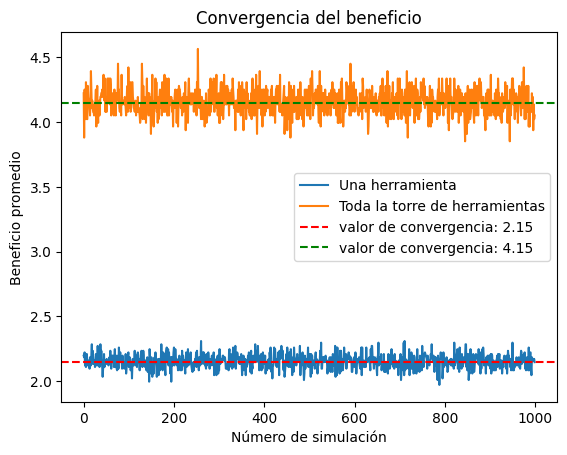

In [46]:
# Simulación de Monte Carlo
num_simulaciones = 1000
beneficio_una_herramienta = [una_herramienta() for i in range(num_simulaciones)]
beneficio_toda_la_torre = [toda_la_torre() for i in range(num_simulaciones)]
costo_promedio_una_herramienta = sum(beneficio_una_herramienta) / num_simulaciones
costo_promedio_toda_la_torre = sum(beneficio_toda_la_torre) / num_simulaciones

# Resultados
print("Costo promedio con política de reemplazo de una herramienta: {:.2f} euros por hora de trabajo".format(costo_promedio_una_herramienta))
print("Costo promedio con política de reemplazo de toda la torre de herramientas: {:.2f} euros por hora de trabajo".format(costo_promedio_toda_la_torre))

if costo_promedio_una_herramienta < costo_promedio_toda_la_torre:
    print("La mejor política es la de reemplazar una herramienta a la vez.")
else:
    print("La mejor política es la de reemplazar toda la torre de herramientas.")

# Graficar convergencia del beneficio
graficar_convergencia_beneficio(beneficio_una_herramienta, beneficio_toda_la_torre)


Podemos concluir que el beneficio esperado que se dio, oscila demasiado por lo que no aseguramos convergencia hacia 2.15 y 4.15 especificamente. 
Pues al ser un beneficio Esperado este varia demasiado en terminos de los eventos y a como suceden, mas aun por que nuestras variables aleatorias juegan un papel muy importante dado que pueden oscilar entre 20 y 90, por lo que puede ser interesante el analisis especifico por casos especificos.

### (b) Resuelva el caso sin el uso de la simulación y compare los resultados. Indique si esto afecta o no a la decisión tomada utilizando la simulación.




Para resolver cuál es la mejor opción, debemos calcular los costos esperados de cada estrategia.

En primer lugar, calculemos el costo esperado por hora de la estrategia actual (cambio de herramienta única):

El costo de una hora de máquina parada es de $100$ euros, y el costo de reemplazo de una herramienta es de $10$ euros. Por lo tanto, el costo esperado por hora es:

**Costo esperado por hora = Costo de máquina parada + Costo de herramientas = (100 $\cdot$ Probabilidad de fallo por hora) + 10**


Para calcular el costo total esperado por hora, debemos sumar los costos esperados por hora para cada una de las probabilidades de fallo por hora en la tabla, y dividir entre el numero total de horas trabajadas, en este caso son $350$ horas. El resultado es:

$Costo \cdot total \cdot esperado \cdot por \cdot hora = \frac{(100 * 0.05 + 10) + (100 * 0.15 + 10) + (100 * 0.15 + 10) + (100 * 0.20 + 10) + (100 * 0.20 + 10) + (100 * 0.15 + 10) + (100 * 0.10 + 10)}{350} = 0.4857 \cdot euros/hora$


En segundo lugar, calculemos el costo esperado por hora de la estrategia propuesta (cambio de torre de herramientas completa):

Cuando falla una herramienta, se reemplaza toda la torre de herramientas. El costo de reemplazo de una torre completa es de $5 * 10 = 50 \cdot euros$. 

El tiempo necesario para el reemplazo es de dos horas. Por lo tanto, el costo esperado por hora es:

**Costo esperado por hora = Costo de máquina parada + Costo de herramientas = (100 $\cdot$ Probabilidad de fallo por hora $\cdot$ 2) + 50**

Nuevamente, para calcular el costo total esperado por hora, debemos sumar los costos esperados por hora para cada una de las probabilidades de fallo por hora en la tabla y dividir entre el numero de horas trabajadas en este caso son $420$ horas. El resultado es:

$Costo \cdot total \cdot esperado \cdot por \cdot hora = \\ \frac{(100 * 0.05 * 2 + 50) + (100 * 0.15 * 2 + 50) + (100 * 0.15 * 2 + 50) + (100 * 0.20 * 2 + 50) + (100 * 0.20 * 2 + 50) + (100 * 0.15 * 2 + 50) + (100 * 0.10 * 2 + 50)}{420} = 1.30 \cdot euros/hora$


Por lo tanto, el costo esperado por hora de la estrategia de cambiar unicamente la pieza que se dañe es de $0.4857 \cdot euros/hora$, mientras que el costo esperado por la estrategia de cambiar las cinco herramientas de la torre es de $1.30 \cdot euros/hora$.

Como resultado final, decimos que la estrategia actual de cambiar solo la herramienta que falla es mejor que la estrategia propuesta de cambiar toda la torre de herramientas cuando solo una falla. 

Por lo que podemos concluir, que tanto el resultado de la simulación, como el resultado utilizando el valor esperado, coinciden mutuamente, haciendo que se tome la misma decision para ambos casos.